In [1]:
# Install and ensure we have the libraries needed.
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install statsmodels
!pip install graphviz

In [2]:
# Import libraries needed.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
import math
from statsmodels.stats import diagnostic as diag

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.pipeline import Pipeline
import graphviz


In [3]:
#Import the raw dataset into Pandas and display.
df=pd.read_csv('churn_raw_data.csv')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [4]:
#List total number of entries in dataset (RowsxColumn).
print(df.shape)

(10000, 52)


In [5]:
#Display the datatype for each column.
print(df.dtypes)

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [6]:
#Perform checks to see if null values exists.
print(df.isna().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [7]:
#Rename the columns named item1 item2, etc.
df=df.rename({'item1' : 'Timely_Response',
                    'item2' : 'Timely_Fixes',
                    'item3' : 'Timely_Replacement',
                    'item4' : 'Reliability',
                    'item5' : 'Options',
                    'item6' : 'Respectable_Response',
                    'item7' : 'Courteous_Exchange',
                    'item8' : 'Evidence_of_active_listening'}, axis='columns')

In [8]:
#Look at the basic statistics of the dataset.
df[['Bandwidth_GB_Year', 'Area','Employment','Income','Contract',
        'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].describe()

,Bandwidth_GB_Year,Income,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
count,8979.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3398.842752,39936.762226,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2187.396807,28358.469482,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,155.506715,740.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1234.110529,19285.522500,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3382.424000,33186.785000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,5587.096500,53472.395000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,7158.982000,258900.700000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
#Create new dataframe and drop all unused columns for regression
dflog=df.drop(['Unnamed: 0','Age','CaseOrder','Customer_id','Interaction','City','State',
               'County','Zip','Lat','Lng','Population','Timezone','Job',
               'Children','Education','Marital', 'Outage_sec_perweek',
               'Email','Contacts','Yearly_equip_failure', 'Gender','PaperlessBilling',
               'MonthlyCharge','PaymentMethod', 'Techie','Port_modem','Tablet', 'Tenure','Churn'], axis = 1)

dflog

,Area,Employment,Income,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
0,Urban,Part Time,28561.99,One year,Fiber Optic,Yes,No,Yes,Yes,No,...,Yes,904.536110,5,5,5,3,4,4,3,4
1,Urban,Retired,21704.77,Month-to-month,Fiber Optic,Yes,Yes,Yes,No,No,...,Yes,800.982766,3,4,3,3,4,3,4,4
2,Urban,Student,NaN,Two Year,DSL,Yes,Yes,No,No,No,...,Yes,2054.706961,4,4,2,4,4,3,3,3
3,Suburban,Retired,18925.23,Two Year,DSL,Yes,No,Yes,No,No,...,No,2164.579412,4,4,4,2,5,4,3,3
4,Suburban,Student,40074.19,Month-to-month,Fiber Optic,No,No,No,No,No,...,No,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Retired,55723.74,Month-to-month,DSL,NaN,Yes,No,Yes,Yes,...,No,6511.253000,3,2,3,3,4,3,2,3
9996,Rural,Part Time,NaN,Two Year,Fiber Optic,NaN,Yes,Yes,Yes,Yes,...,No,5695.952000,4,5,5,4,4,5,2,5
9997,Rural,Full Time,NaN,Month-to-month,Fiber Optic,Yes,Yes,Yes,Yes,No,...,No,4159.306000,4,4,4,4,4,4,4,5
9998,Urban,Full Time,16667.58,Two Year,Fiber Optic,No,Yes,No,No,No,...,Yes,6468.457000,4,4,6,4,3,3,5,4


In [10]:
#Check for duplicate rows
dflog.duplicated().sum()

0

In [11]:
#Drop duplicate rows
dflog=dflog.drop_duplicates(keep='first')

In [12]:
#Check for duplicate rows
dflog.duplicated().unique()

array([False])

In [13]:
#Next we look at the unique string value from categorical columns that can be potentially recoded.
#A potential variable is any variable that is: easily understood, easily describable and can be methodologically recoded.
dflog['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
dflog['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [15]:
dflog['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [16]:
dflog['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [17]:
dflog['Phone'].unique()

array(['Yes', 'No', nan], dtype=object)

In [18]:
dflog['Multiple'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
dflog['OnlineSecurity'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
dflog['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
dflog['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
dflog['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
dflog['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
dflog['StreamingMovies'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
#Once we know the unique values for the categorical columns we want to change,
#we'll perform the necessary codes on them. First we'll change all binary values and the 'InternetService'
#column to 1 or 0. 
#We'll also fill NaN value for column 'TechSupport', 'Phone' with 0 as we will assume that these
#value were left empty as they did not apply to the customer.

dflog=dflog.replace(['Yes','Fiber Optic', 'DSL','Male'],'1')
dflog=dflog.replace(['No', 'None'],'0')
dflog[['TechSupport', 'Phone']] = dflog[['TechSupport', 'Phone']].fillna(value=0)
dflog=dflog.astype({'Bandwidth_GB_Year': 'float64',
                    'InternetService': 'float64', 
                    'Phone': 'float64',
                    'Multiple': 'float64',         
                    'OnlineSecurity': 'float64',
                    'OnlineBackup': 'float64',
                    'DeviceProtection': 'float64',
                    'TechSupport': 'float64',
                    'StreamingTV': 'float64',
                    'StreamingMovies': 'float64',})


In [26]:
#Recode Area with 'Urban'=2, 'Suburban'=1, 'Rural'=0. Also convert datatype to float.
dflog=dflog.replace(['Urban'] ,'2');
dflog=dflog.replace(['Suburban'],'1');
dflog=dflog.replace(['Rural'],'0');
dflog=dflog.astype({'Area': 'float64'})
print(dflog['Area'])

0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    2.0
9999    2.0
Name: Area, Length: 10000, dtype: float64


In [27]:
#Recode Employment 'Retired' from 4 to 'Unemployed' at 0. Also convert datatype to float.

dflog=dflog.replace(['Retired'] ,'4');
dflog=dflog.replace(['Full Time'] ,'3');
dflog=dflog.replace(['Part Time'] ,'2');
dflog=dflog.replace(['Student'],'1');
dflog=dflog.replace(['Unemployed'],'0');
dflog=dflog.astype({'Employment': 'float64'})
print(dflog['Employment'])

0       2.0
1       4.0
2       1.0
3       4.0
4       1.0
       ... 
9995    4.0
9996    2.0
9997    3.0
9998    3.0
9999    3.0
Name: Employment, Length: 10000, dtype: float64


In [28]:
#Recode Contract with 'Two Year'=2, 'One year'=1, 'Month-to-month'=0. Also convert datatype to float.

dflog=dflog.replace(['Two Year'],'2');
dflog=dflog.replace(['One year'],'1');
dflog=dflog.replace(['Month-to-month'],'0');
dflog=dflog.astype({'Contract': 'float64'})
print(dflog['Contract'])

0       1.0
1       0.0
2       2.0
3       2.0
4       0.0
       ... 
9995    0.0
9996    2.0
9997    0.0
9998    2.0
9999    0.0
Name: Contract, Length: 10000, dtype: float64


In [29]:
#Impute missing values with mean values.
#Print to see if there are still any null values.
dflog['Income'] = dflog['Income'].fillna(dflog['Income'].mean())
dflog['Bandwidth_GB_Year'] = dflog['Bandwidth_GB_Year'].fillna(dflog['Bandwidth_GB_Year'].mean())
print(dflog.isna().sum())

Area                            0
Employment                      0
Income                          0
Contract                        0
InternetService                 0
Phone                           0
Multiple                        0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Bandwidth_GB_Year               0
Timely_Response                 0
Timely_Fixes                    0
Timely_Replacement              0
Reliability                     0
Options                         0
Respectable_Response            0
Courteous_Exchange              0
Evidence_of_active_listening    0
dtype: int64


In [30]:
#Get summary statistics on final cleaned dataset
dflog.describe()

,Area,Employment,Income,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000000,2.506800,39936.762226,0.698600,0.787100,0.812800,0.460800,0.357600,0.450600,0.438600,...,0.489000,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,0.815761,1.113408,24575.114845,0.836079,0.409378,0.390091,0.498486,0.479317,0.497579,0.496241,...,0.499904,2072.712613,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,740.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,23660.790000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,39936.762226,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3398.842752,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,2.000000,3.000000,45504.192500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,4.000000,258900.700000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [31]:
#Set new variable for clean data
df_cln=dflog

In [32]:
#Review the new variable
df_cln.shape

(10000, 22)

array([[<AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'Phone'}>,
        <AxesSubplot:title={'center':'Multiple'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>],
       [<AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>],
       [<AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Employment'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'Timely_Fixes'}>,
        <AxesSubplot:title={'center':'Timely_Replacement'}>,
        <AxesSubplot:title={'center':'Reliability'}>],
       [<AxesSubplot:title={'center':'Options'}>,
        <AxesSubplot:title={'center':'Respectable_Response'}>,
        <AxesSubplo

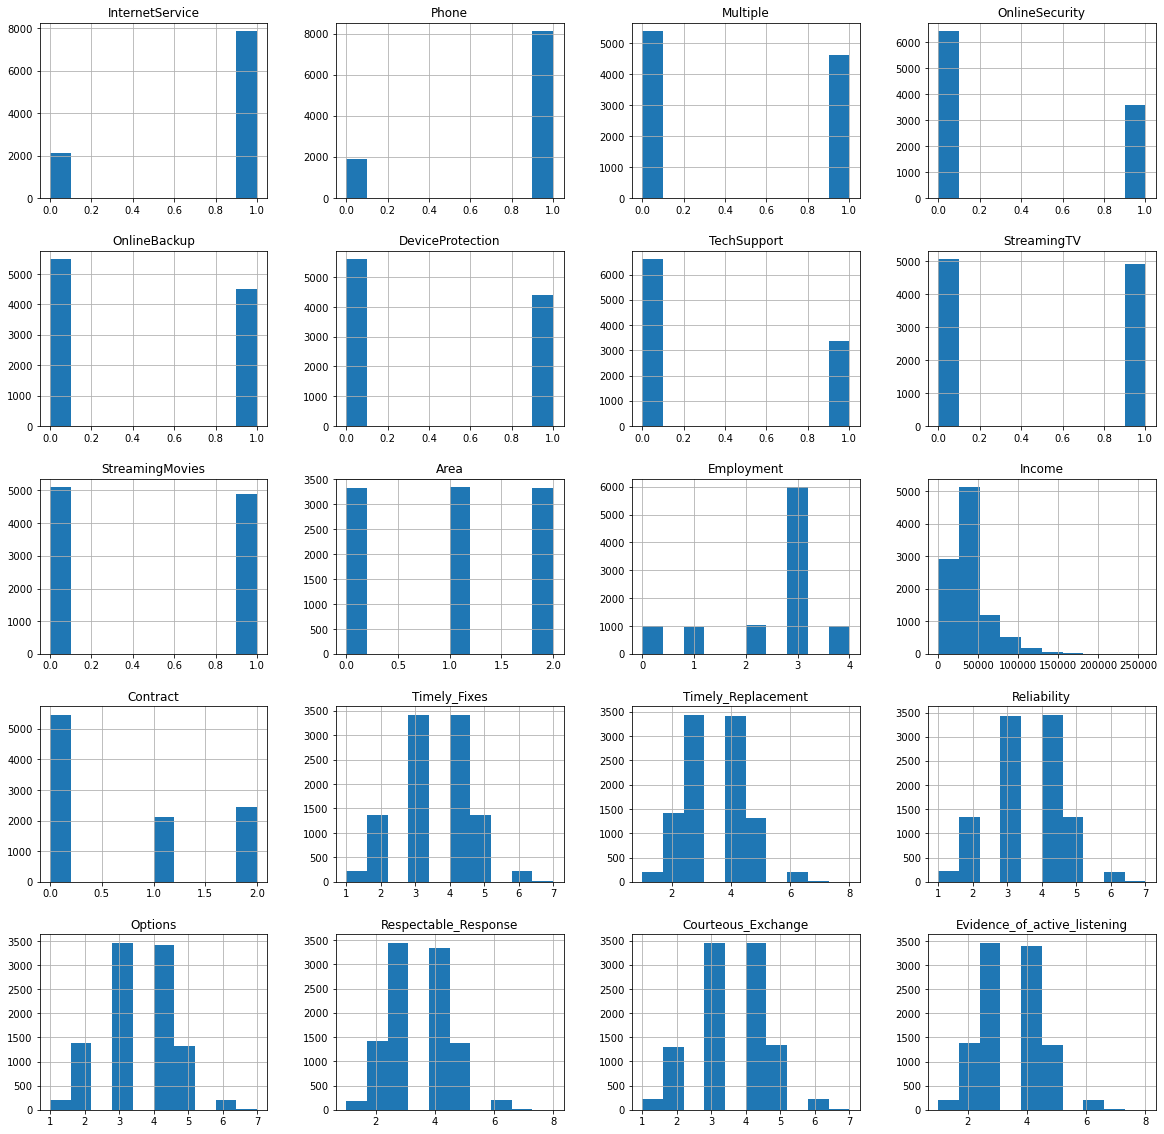

In [33]:
#Perform Univariate Analysis histogram on all predictor variables.
df_cln[['InternetService','Phone','Multiple','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
        'StreamingMovies','Area','Employment','Income',
        'Contract','Timely_Fixes','Timely_Replacement','Reliability',
        'Options','Respectable_Response','Courteous_Exchange',
        'Evidence_of_active_listening']].hist(figsize=(20,20),bins=10)


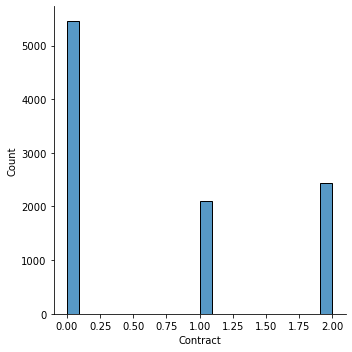

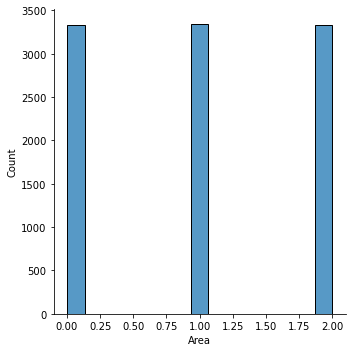

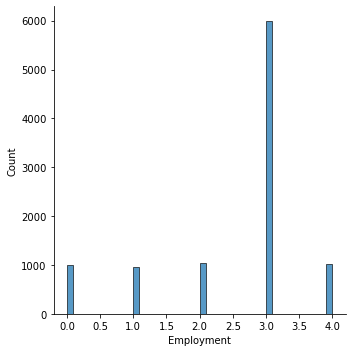

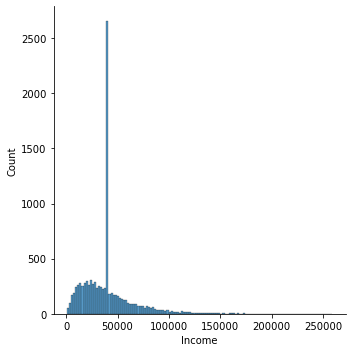

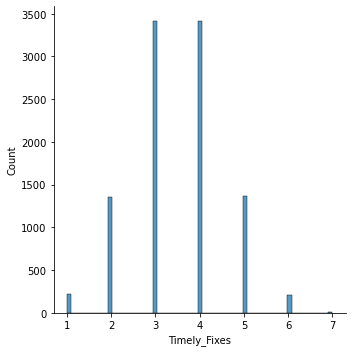

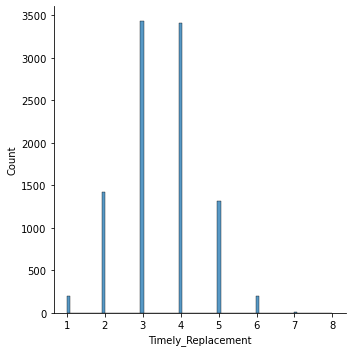

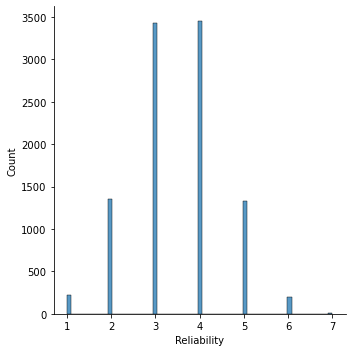

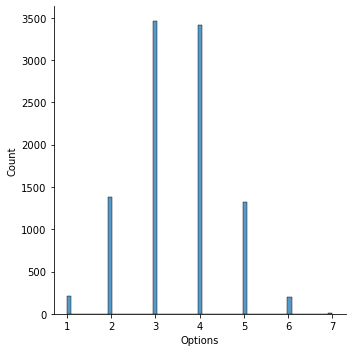

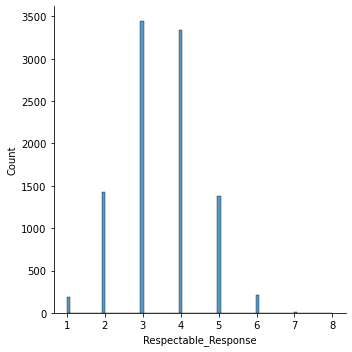

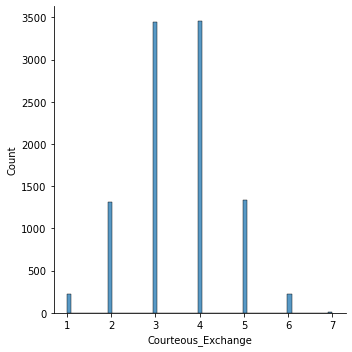

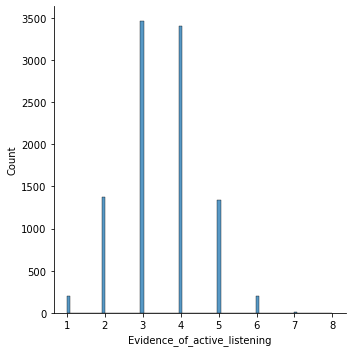

In [34]:
#Create a displot for all predictor variable.
sns.displot(df_cln['Contract'])
sns.displot(df_cln['Area'])
sns.displot(df_cln['Employment'])
sns.displot(df_cln['Income'])
sns.displot(df_cln['Timely_Fixes'])
sns.displot(df_cln['Timely_Replacement'])
sns.displot(df_cln['Reliability'])
sns.displot(df_cln['Options'])
sns.displot(df_cln['Respectable_Response'])
sns.displot(df_cln['Courteous_Exchange'])
sns.displot(df_cln['Evidence_of_active_listening'])

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

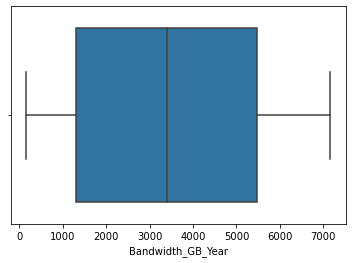

In [35]:
#Create Boxplot for 'Bandwidth_GB_Year'.
sns.boxplot(x='Bandwidth_GB_Year', data=df_cln)

<AxesSubplot:xlabel='Income'>

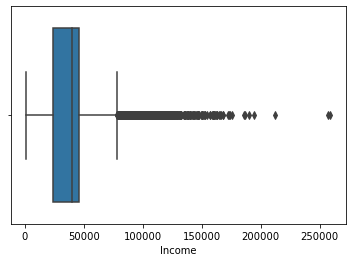

In [36]:
#Create Boxplot for 'Income'.
sns.boxplot(x='Income', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='InternetService'>

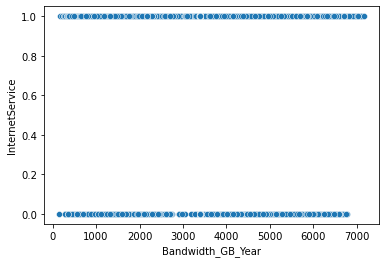

In [37]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='InternetService', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Phone'>

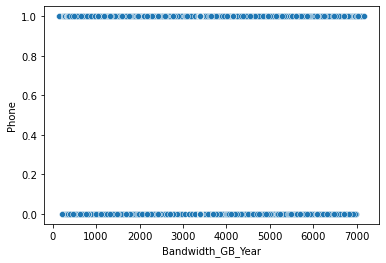

In [38]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Phone', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Multiple'>

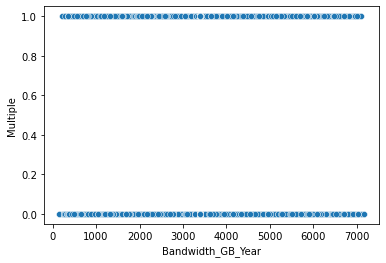

In [39]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Multiple', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='OnlineSecurity'>

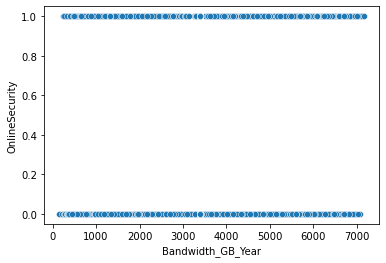

In [40]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='OnlineSecurity', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='OnlineBackup'>

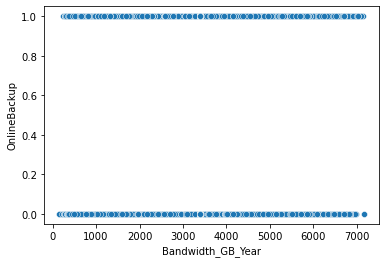

In [41]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='OnlineBackup', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='DeviceProtection'>

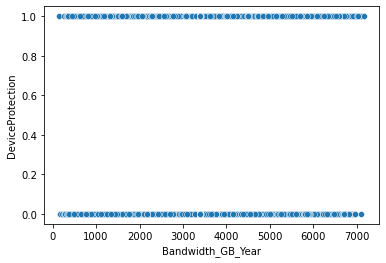

In [42]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='DeviceProtection', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='TechSupport'>

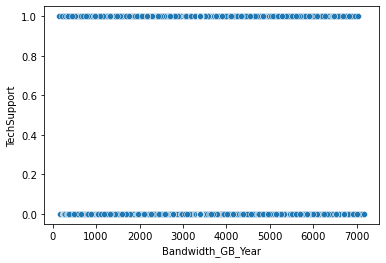

In [43]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='TechSupport', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='StreamingTV'>

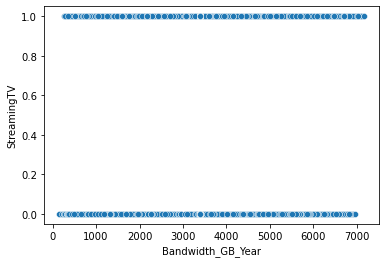

In [44]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='StreamingTV', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='StreamingMovies'>

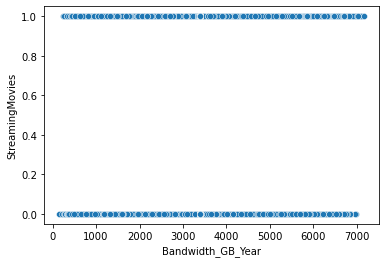

In [45]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='StreamingMovies', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Contract'>

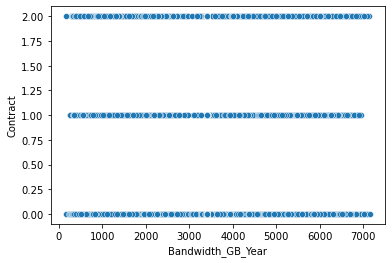

In [46]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Contract', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Area'>

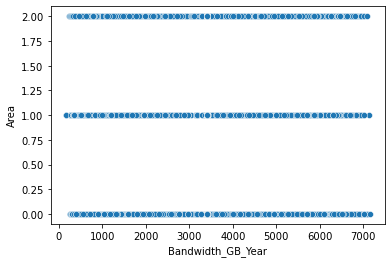

In [47]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Area', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Employment'>

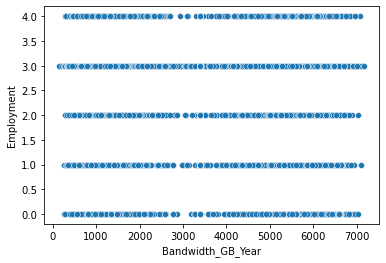

In [48]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Employment', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Income'>

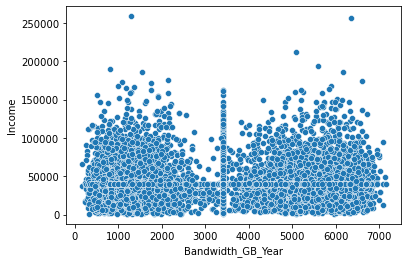

In [49]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Income', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Timely_Fixes'>

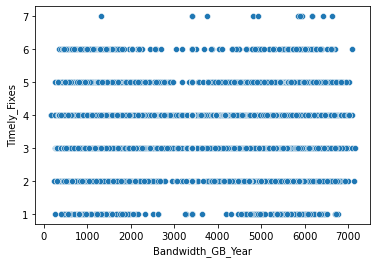

In [50]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Timely_Fixes', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Timely_Replacement'>

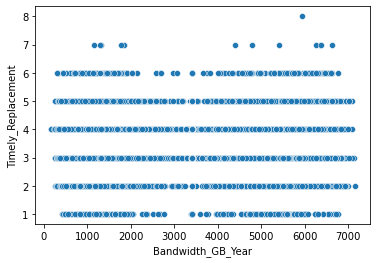

In [51]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Timely_Replacement', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Reliability'>

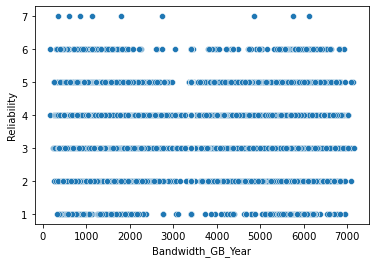

In [52]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Reliability', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Options'>

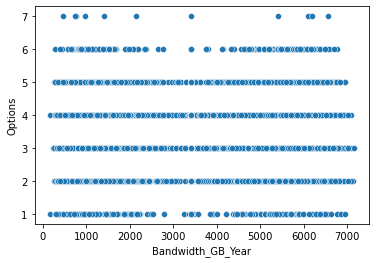

In [53]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Options', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Respectable_Response'>

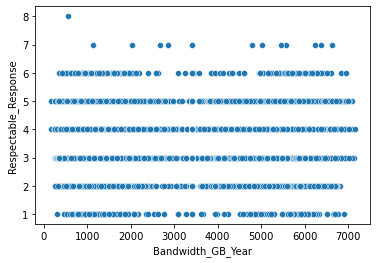

In [54]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Respectable_Response', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Courteous_Exchange'>

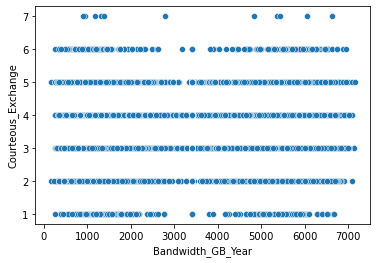

In [55]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Courteous_Exchange', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Evidence_of_active_listening'>

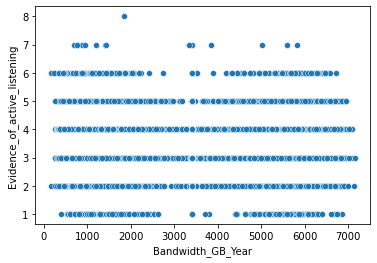

In [56]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.scatterplot(x='Bandwidth_GB_Year',y='Evidence_of_active_listening', data=df_cln)

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='InternetService'>

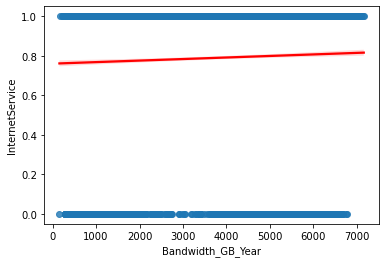

In [57]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='InternetService', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Phone'>

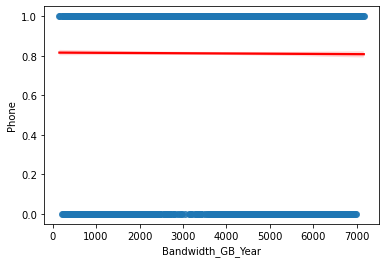

In [58]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Phone', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Multiple'>

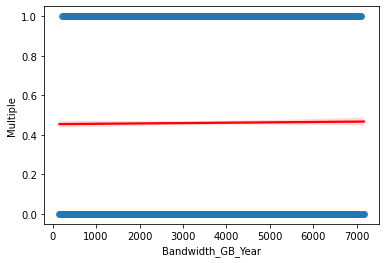

In [59]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Multiple', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='OnlineSecurity'>

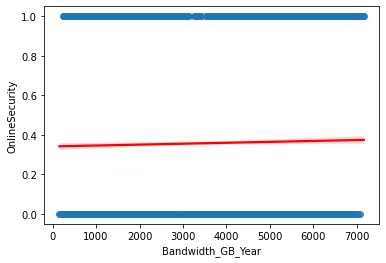

In [60]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='OnlineSecurity', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='OnlineBackup'>

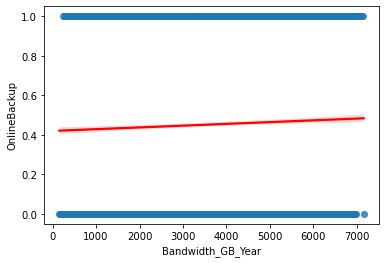

In [61]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='OnlineBackup', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='DeviceProtection'>

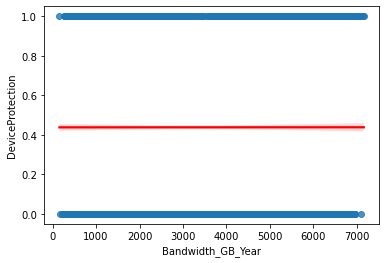

In [62]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='DeviceProtection', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='TechSupport'>

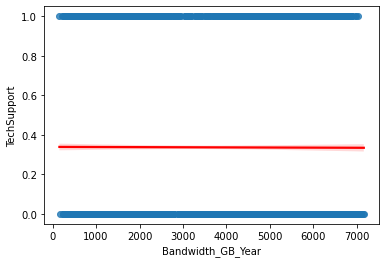

In [63]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='TechSupport', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='StreamingTV'>

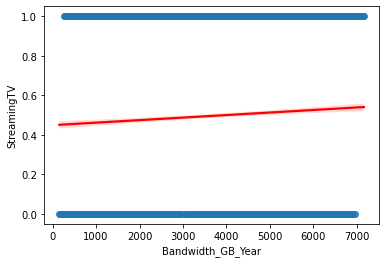

In [64]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='StreamingTV', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='StreamingMovies'>

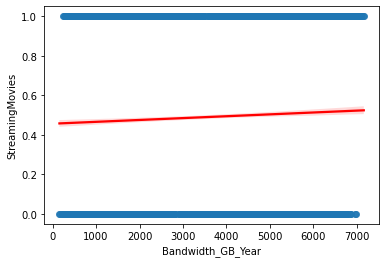

In [65]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='StreamingMovies', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Contract'>

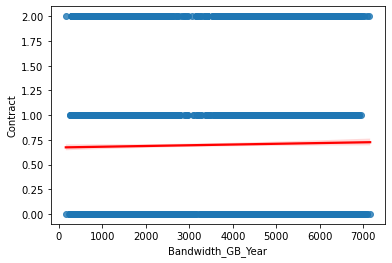

In [66]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Contract', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Area'>

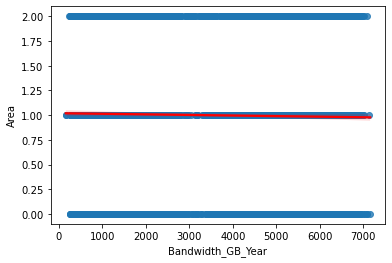

In [67]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Area', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Employment'>

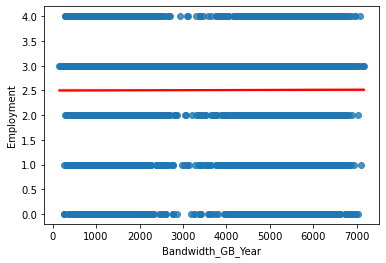

In [68]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Employment', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Income'>

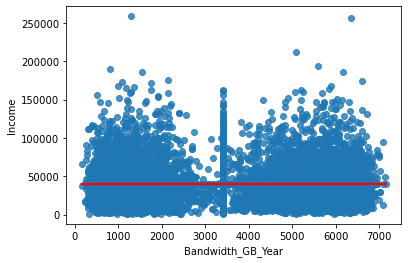

In [69]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Income', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Timely_Fixes'>

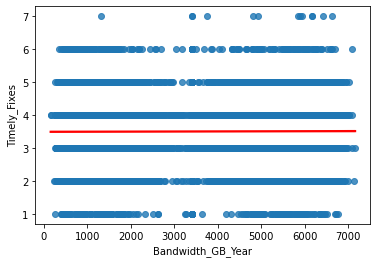

In [70]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Timely_Fixes', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Timely_Replacement'>

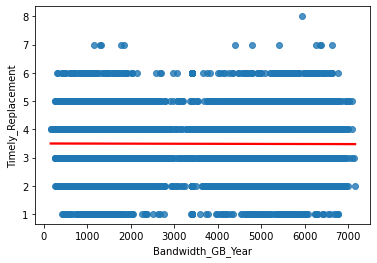

In [71]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Timely_Replacement', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Reliability'>

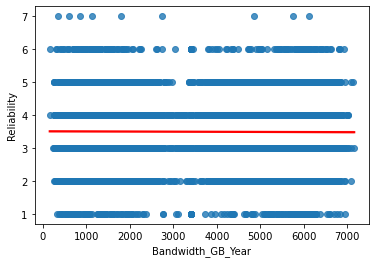

In [72]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Reliability', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Options'>

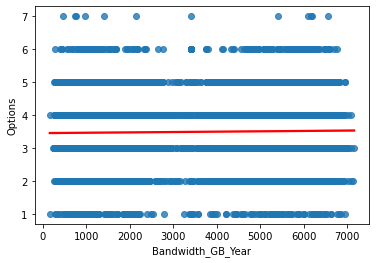

In [73]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Options', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Respectable_Response'>

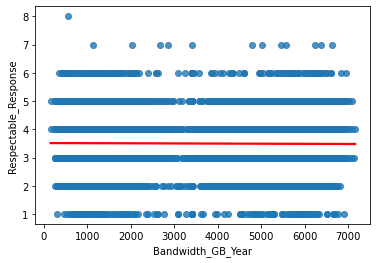

In [74]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Respectable_Response', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Courteous_Exchange'>

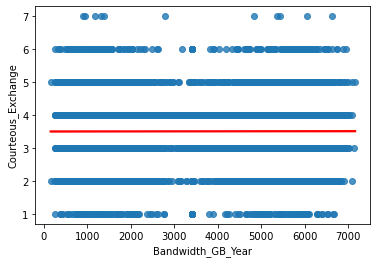

In [75]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Courteous_Exchange', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Evidence_of_active_listening'>

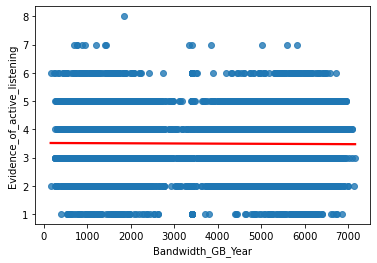

In [76]:
#Create Bivariate Analysis of Bandwidth_GB_Year and predictor variables.
sns.regplot(x='Bandwidth_GB_Year',y='Evidence_of_active_listening', data=df_cln, line_kws={"color": "red"})

In [77]:
#Export cleaned dataset to a new CSV file
df_cln.to_csv('D209_Cleaned_Dataset_T2.csv')

In [79]:
#Create Dummy Variables for Categorical Variables
d_var=pd.get_dummies(df[['Area','Employment','Contract']], prefix="Dummy", drop_first=True)
d_var

,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0
2,0,1,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,0,0,1,0,0,0,0
9996,0,0,1,0,0,0,0,1
9997,0,0,0,0,0,0,0,0
9998,0,1,0,0,0,0,0,1


In [80]:
#Add the dummy variable to a new df. Drop the rows that has null values and create copy of the data frame.
reg_df=pd.concat([df_cln,d_var], axis=1)
reg_df=reg_df.dropna()
reg_clndf=reg_df
reg_df=reg_df.drop(['Area','Employment','Contract','Bandwidth_GB_Year'], axis=1)
print(reg_clndf)

      Area  Employment        Income  Contract  InternetService  Phone  \
0      2.0         2.0  28561.990000       1.0              1.0    1.0   
1      2.0         4.0  21704.770000       0.0              1.0    1.0   
2      2.0         1.0  39936.762226       2.0              1.0    1.0   
3      1.0         4.0  18925.230000       2.0              1.0    1.0   
4      1.0         1.0  40074.190000       0.0              1.0    0.0   
...    ...         ...           ...       ...              ...    ...   
9995   0.0         4.0  55723.740000       0.0              1.0    0.0   
9996   0.0         2.0  39936.762226       2.0              1.0    0.0   
9997   0.0         3.0  39936.762226       0.0              1.0    1.0   
9998   2.0         3.0  16667.580000       2.0              1.0    0.0   
9999   2.0         3.0  39936.762226       0.0              1.0    1.0   

      Multiple  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0          0.0             1.0          

In [81]:
#Look at the new df
reg_df.shape

(10000, 26)

In [82]:
#Summary statistic of final df
reg_clndf.describe()

,Area,Employment,Income,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,...,Courteous_Exchange,Evidence_of_active_listening,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000000,2.506800,39936.762226,0.698600,0.787100,0.812800,0.460800,0.357600,0.450600,0.438600,...,3.509500,3.495600,0.334600,0.332700,0.104200,0.101100,0.096400,0.099100,0.210200,0.244200
std,0.815761,1.113408,24575.114845,0.836079,0.409378,0.390091,0.498486,0.479317,0.497579,0.496241,...,1.028502,1.028633,0.471874,0.471204,0.305535,0.301476,0.295154,0.298811,0.407471,0.429633
min,0.000000,0.000000,740.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23660.790000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,39936.762226,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,45504.192500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,4.000000,258900.700000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
#Create new dataframe of Predictor and Target Variable for Multiple Regression Modeling
X=reg_df
y=reg_clndf[['Bandwidth_GB_Year']]

In [84]:
#Partition the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
print (round(sum(train['Bandwidth_GB_Year'])/len(train)), 2)
print (round(sum(test['Bandwidth_GB_Year'])/len(test), 2))


3404 2
3378.39


In [85]:
#Initialize and Fit Decision Tree
d_tree=DecisionTreeRegressor()
d_tree.fit(X_train,np.ravel(y_train))

DecisionTreeRegressor()

In [86]:
# Make a prediction for each observation in new_data and assign it to y_predict
y_predict = d_tree.predict(X_test)
print(y_predict)

[5760.908    1885.438773 3343.613    ... 1143.38     6317.45
 5477.048   ]


In [87]:
#Find Rsquare
r_sqr=r2_score(y_test,y_predict)
r_sqr

-1.0830346725429534

In [88]:
#Cross validate model
scores = cross_val_score(d_tree, X_test, np.ravel(y_test), cv=10, scoring='r2')


#Print Cross Validation
print('10-Fold cross-validation', scores)

10-Fold cross-validation [-1.29181362 -0.97155761 -1.0638099  -0.83640765 -0.74777484 -0.97713439
 -0.86875112 -0.90521817 -0.86580531 -0.98061316]


In [89]:
#Measure of Error
model_mse=mean_squared_error(y_test,y_predict)
model_mae=mean_absolute_error(y_test, y_predict)
model_rmse=math.sqrt(model_mse)

print('MSE {:.3f})'.format(model_mse))
print('MAE {:.3f})'.format(model_mae))
print('RMSE {:.3f})'.format(model_rmse))

MSE 8798964.981)
MAE 2395.397)
RMSE 2966.305)


In [90]:
#Identify Feature Importance
f_df=pd.DataFrame({'Feature_names':reg_df.columns, 
                   'Importances':d_tree.feature_importances_}).sort_values(by='Importances', ascending=False)
f_df

,Feature_names,Importances
0,Income,0.200499
17,Evidence_of_active_listening,0.066427
13,Reliability,0.065789
16,Courteous_Exchange,0.059705
14,Options,0.059645
11,Timely_Fixes,0.055822
15,Respectable_Response,0.055495
10,Timely_Response,0.053902
12,Timely_Replacement,0.049493
7,TechSupport,0.029607


In [91]:
#Create Pipeline and perform GridsearchCV for hypertuning

#Set range for max depth
d_range = range(1, 51)

#Set leaf sample
num_leafs = [1, 5, 10, 20, 50, 100]

# Setup the pipeline
steps = [('d_tree', DecisionTreeRegressor(random_state=42))]
        
# Create the pipeline
pipeline = Pipeline(steps)

#Initialize parameters
parameters = {'d_tree__max_depth':d_range,
             'd_tree__min_samples_leaf':num_leafs}

# Initialize Grid_pipeline
grid_pipeline = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='r2', cv=10)

# Fit Grid_pipeline
grid_pipeline.fit(X_train,np.ravel(y_train))


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('d_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'d_tree__max_depth': range(1, 51),
                         'd_tree__min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             scoring='r2')

In [92]:
#Find the best score using grid_pipeline variable
print(grid_pipeline.best_score_)

-0.00406245720216607


In [93]:
#Find the best parameter using grid_pipeline variable
print(grid_pipeline.best_params_)

{'d_tree__max_depth': 2, 'd_tree__min_samples_leaf': 50}


In [94]:
#Create new model using best parameter
new_model = grid_pipeline.best_estimator_
new_model.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('d_tree',
                 DecisionTreeRegressor(max_depth=2, min_samples_leaf=50,
                                       random_state=42))])

In [95]:
# Make a prediction for each observation in new_data and assign it to y_predict2
y_predict2 = new_model.predict(X_test)
print(y_predict2)

[3387.76458796 3619.76226581 3619.76226581 ... 3209.28769046 3387.76458796
 3209.28769046]


In [96]:
#Find Rsquare for new model
r_sqr2=r2_score(y_test,y_predict2)
r_sqr2

0.004932130347084507

In [97]:
#Cross validate new model
scores2 = cross_val_score(new_model, X_test, np.ravel(y_test), cv=10, scoring='r2')


#Print Cross Validation
print('10-Fold cross-validation', scores2)

10-Fold cross-validation [-0.01034665 -0.05332627 -0.01583518 -0.00960102 -0.01159667 -0.00278234
  0.00144057 -0.00248906 -0.00153141 -0.00220538]


In [98]:
#Measure of Error
model_mse2=mean_squared_error(y_test,y_predict2)
model_mae2=mean_absolute_error(y_test, y_predict2)
model_rmse2=math.sqrt(model_mse2)

print('MSE {:.3f})'.format(model_mse2))
print('MAE {:.3f})'.format(model_mae2))
print('RMSE {:.3f})'.format(model_rmse2))

MSE 4203274.892)
MAE 1857.676)
RMSE 2050.189)


In [99]:
#Compare model without/without hypertuninig
print('Evaluation metric without hypertuning: ')
print('R-Square: ', r_sqr)
print('MSE: {:.3f})'.format(model_mse))
print('MAE: {:.3f})'.format(model_mae))
print('RMSE: {:.3f})'.format(model_rmse))
print('\n')

print('Evaluation metric with hypertuning: ')
print('R-Square: ', r_sqr2)
print('MSE: {:.3f})'.format(model_mse2))
print('MAE: {:.3f})'.format(model_mae2))
print('RMSE: {:.3f})'.format(model_rmse2))

Evaluation metric without hypertuning: 
R-Square:  -1.0830346725429534
MSE: 8798964.981)
MAE: 2395.397)
RMSE: 2966.305)


Evaluation metric with hypertuning: 
R-Square:  0.004932130347084507
MSE: 4203274.892)
MAE: 1857.676)
RMSE: 2050.189)


In [100]:
#Initialize best parameters in new decisiontree and identify Feature Importance of new model
d_tree2=DecisionTreeRegressor(max_depth=2,min_samples_leaf=50, random_state=42)
d_tree2.fit(X_train,np.ravel(y_train))

f_df1=pd.DataFrame({'Feature_names':reg_df.columns, 
                    'Importances':d_tree2.feature_importances_}).sort_values(by='Importances', ascending=False)
print(f_df1)

                   Feature_names  Importances
8                    StreamingTV     0.409261
9                StreamingMovies     0.303760
5                   OnlineBackup     0.286979
0                         Income     0.000000
15          Respectable_Response     0.000000
24                Dummy_One year     0.000000
23              Dummy_Unemployed     0.000000
22                 Dummy_Student     0.000000
21                 Dummy_Retired     0.000000
20               Dummy_Part Time     0.000000
19                   Dummy_Urban     0.000000
18                Dummy_Suburban     0.000000
17  Evidence_of_active_listening     0.000000
16            Courteous_Exchange     0.000000
13                   Reliability     0.000000
14                       Options     0.000000
1                InternetService     0.000000
12            Timely_Replacement     0.000000
11                  Timely_Fixes     0.000000
10               Timely_Response     0.000000
7                    TechSupport  

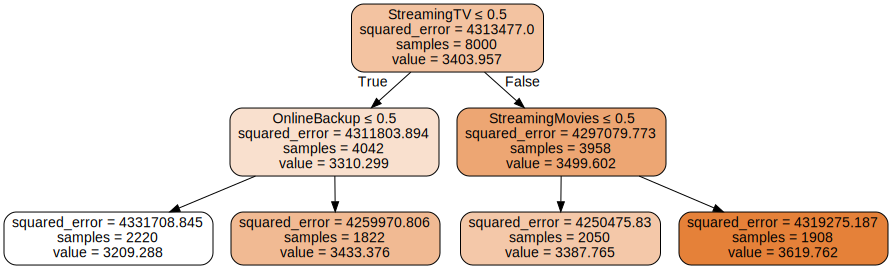

In [101]:
#Using Graphviz, graph model with max_depth set to 2
dot_data = tree.export_graphviz(d_tree2, out_file=None, 
                                feature_names=reg_df.columns,  
                                class_names=reg_df,  
                                filled=True, rounded=True,
                                special_characters=True, max_depth=2)  
graph = graphviz.Source(dot_data)
graph